In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('../data/bank_data.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


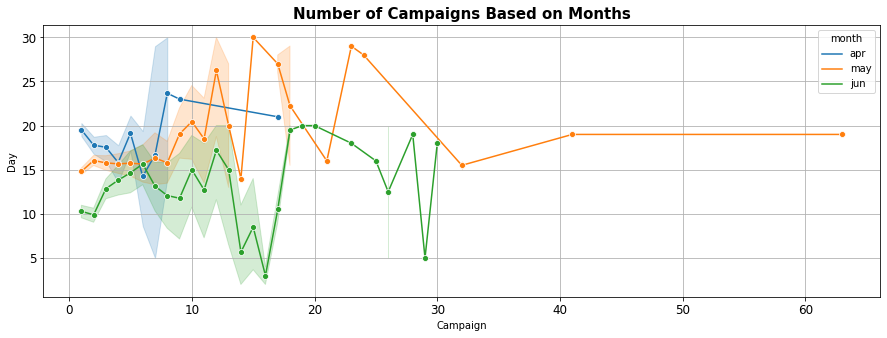

In [3]:
df_month = df[(df.month == 'apr') | (df.month == 'may') | (df.month == 'jun')][['month','campaign', 'day']]
df_month.columns = ['month', 'Campaign', 'Day']
fig = plt.figure(figsize=(15, 5))
plt.title('Number of Campaigns Based on Months', fontsize=15, fontweight='bold')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
hue_order = ['apr', 'may', 'jun']
sns.lineplot(data=df_month, x = 'Campaign', y='Day', hue='month', marker='o', hue_order = hue_order)
plt.grid()



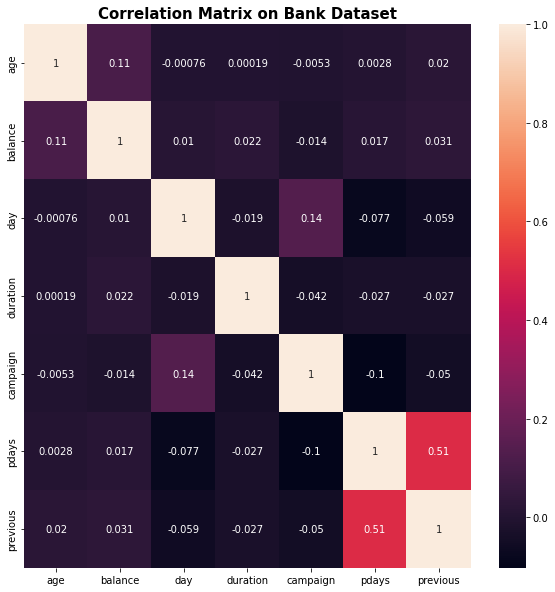

In [4]:
heatmap_df = df[['age', 'balance', 'day', 'duration', 'campaign' ,'pdays', 'previous']]
fig = plt.figure(figsize=(10, 10))
plt.title('Correlation Matrix on Bank Dataset', fontsize=15, fontweight='bold')
sns.heatmap(heatmap_df.corr(), annot=True)

(array([   0.,  500., 1000., 1500., 2000., 2500.]),
 <a list of 6 Text major ticklabel objects>)

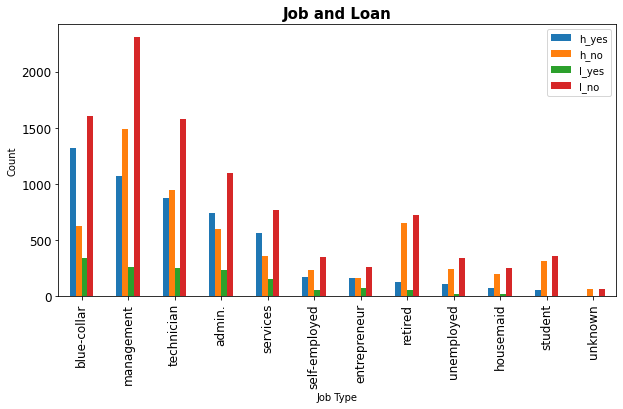

In [5]:
job_and_loan_df = pd.DataFrame()

job_and_loan_df['h_yes'] = df[df['housing'] == 'yes']['job'].value_counts()
job_and_loan_df['h_no'] = df[df['housing'] == 'no']['job'].value_counts()

job_and_loan_df['l_yes'] = df[df['loan'] == 'yes']['job'].value_counts()
job_and_loan_df['l_no'] = df[df['loan'] == 'no']['job'].value_counts()


job_and_loan_df.plot(kind = 'bar', xlabel = 'Job Type', ylabel = 'Count', figsize=(10,5))

plt.title('Job and Loan', fontsize=15, fontweight='bold')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)


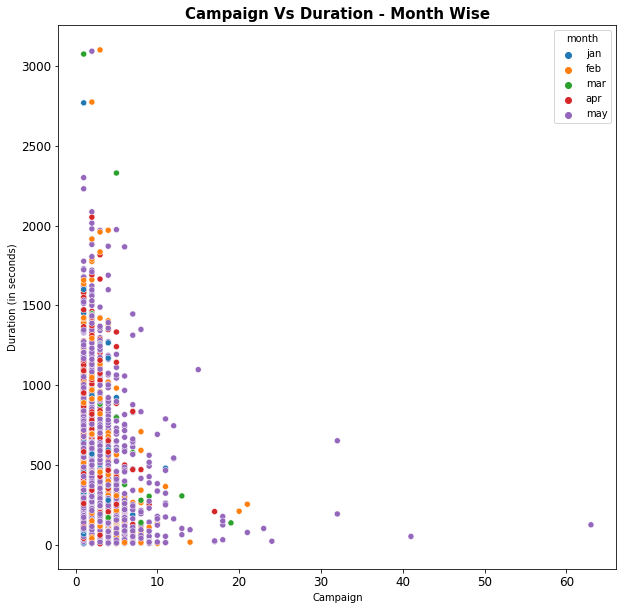

In [6]:
df_mon = df[(df.month == 'jan') | (df.month == 'feb') | (df.month == 'mar') | (df.month == 'apr') | (df.month == 'may')][['month', 'campaign', 'duration']]
fig = plt.figure(figsize=(10,10))
plt.title('Campaign Vs Duration - Month Wise', fontsize=15, fontweight='bold')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
df_mon.columns = ['month', 'Campaign', 'Duration (in seconds)']
hue_order = ['jan', 'feb', 'mar', 'apr', 'may']
sns.scatterplot(data=df_mon, x='Campaign', y='Duration (in seconds)', hue='month', hue_order = hue_order)

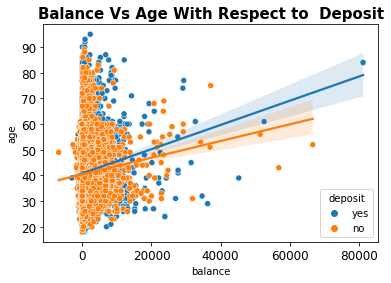

In [7]:
plt.title('Balance Vs Age With Respect to  Deposit', fontsize=15, fontweight='bold')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
dep_y = df[df['deposit'] == 'yes']
dep_n = df[df['deposit'] == 'no']

sns.regplot(data=dep_y, x='balance', y='age', scatter=False)
sns.regplot(data=dep_n, x='balance', y='age', scatter=False)
sns.scatterplot(data=df, x='balance', y='age', hue='deposit')


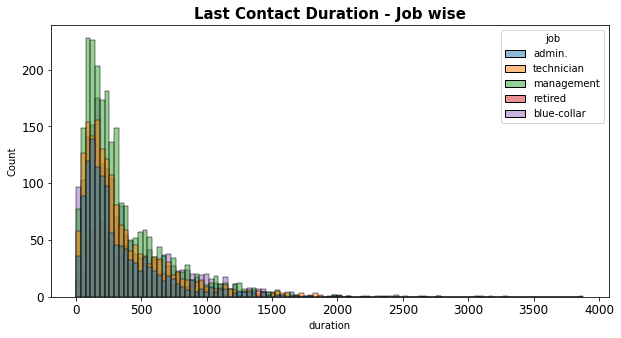

In [20]:
fig = plt.figure(figsize=(10,5))
plt.title('Last Contact Duration - Job wise', fontsize=15, fontweight='bold')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

job_df = df[(df.job == 'blue-collar') | (df.job == 'retired') | (df.job == 'technician') | (df.job == 'admin.') | (df.job == 'management')][['job','duration']]

sns.histplot(data=job_df, x= 'duration',hue='job')

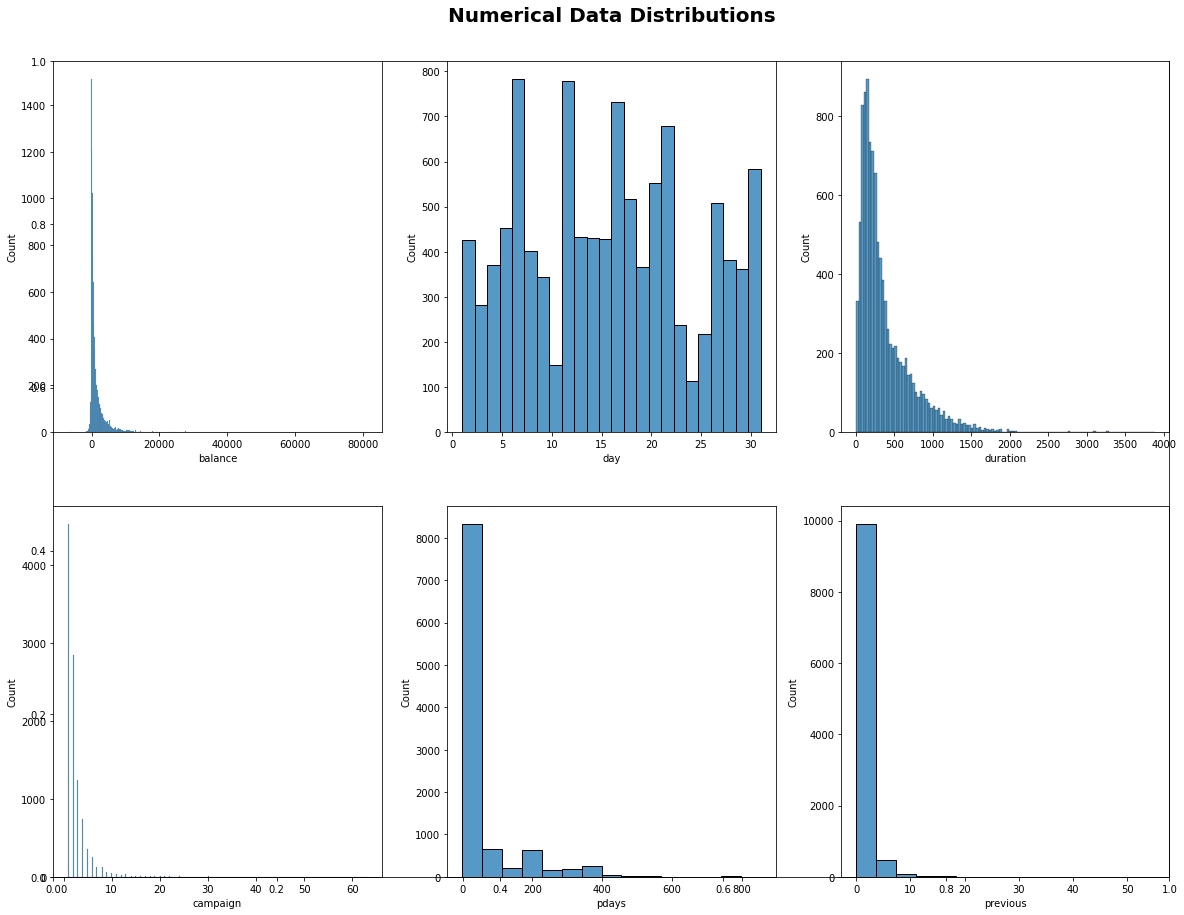

In [12]:
num_df = df[['balance', 'day', 'duration', 'campaign', 'pdays', 'previous']]
fig = plt.figure(figsize=(20,15))

plt.title('Numerical Data Distributions', fontsize=20, fontweight='bold', pad= 40)

for i in range(6):
  ax = fig.add_subplot(2,3,i+1)

  sns.histplot(num_df[num_df.columns[i]])


In [10]:
df.drop(df[(df.poutcome == 'other') | (df.month == 'dec')].index, inplace= True)

In [11]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


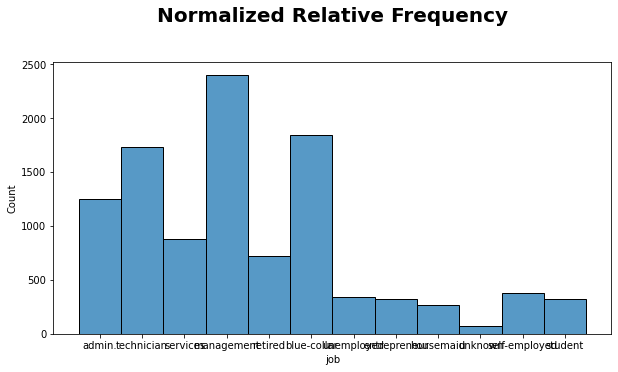

In [32]:
# df_cat = df[['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']]
# fig = plt.figure(figsize=(10,5))

# plt.title('Normalized Relative Frequency', fontsize=20, fontweight='bold', pad= 40)
# # for i in range(9):
# ax = fig.add_subplot(1,1,1)
# sns.histplot(df_cat[df_cat.columns[0]])